<a href="https://colab.research.google.com/github/22AD081/NLP-new/blob/main/NLP_Ass_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
pip install transformers datasets torch seaborn matplotlib pandas scikit-learn

In [11]:
import torch
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from transformers import BertTokenizer, BertModel, BertForSequenceClassification

# Load your uploaded dataset
file_path = "/content/Final_Augmented_dataset_Diseases_and_Symptoms.csv"
df = pd.read_csv(file_path)

# Display dataset columns to check where medical text is stored
print("Dataset Columns:", df.columns)

Dataset Columns: Index(['diseases', 'anxiety and nervousness', 'depression',
       'shortness of breath', 'depressive or psychotic symptoms',
       'sharp chest pain', 'dizziness', 'insomnia',
       'abnormal involuntary movements', 'chest tightness',
       ...
       'stuttering or stammering', 'problems with orgasm', 'nose deformity',
       'lump over jaw', 'sore in nose', 'hip weakness', 'back swelling',
       'ankle stiffness or tightness', 'ankle weakness', 'neck weakness'],
      dtype='object', length=378)


In [17]:
text_column = "diseases"
medical_notes = df[text_column].dropna().tolist()

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at emilyalsentzer/Bio_ClinicalBERT and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.



🔍 Visualizing Attention for Medical Report 1:

panic disorder


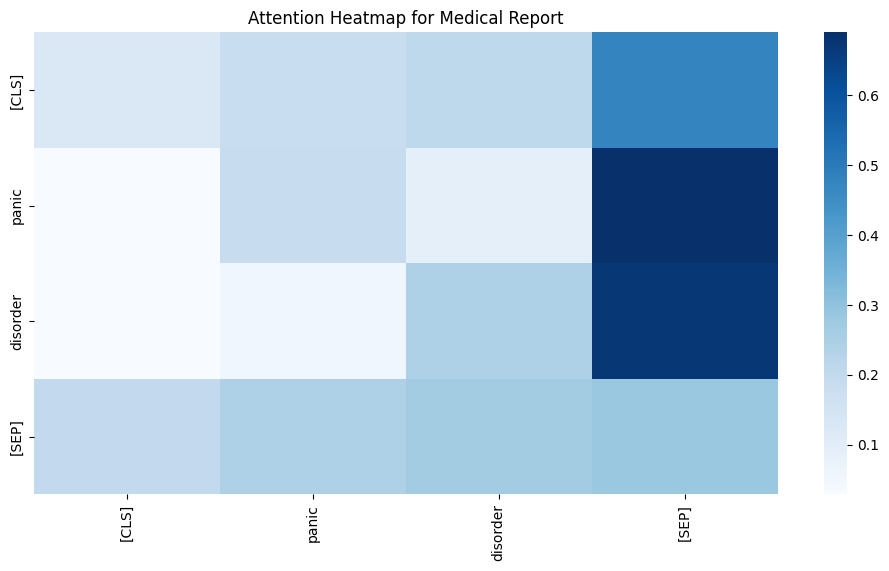


🔍 Visualizing Attention for Medical Report 2:

panic disorder


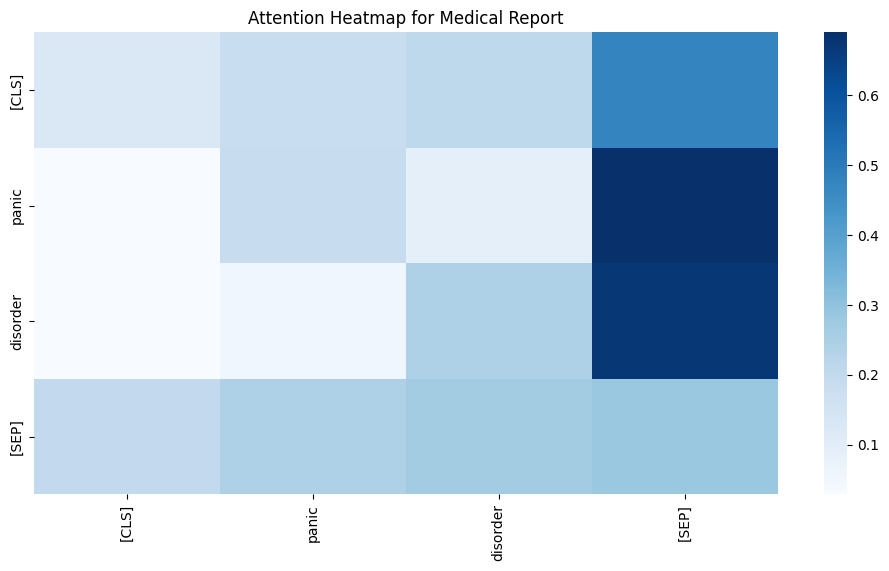


🔍 Visualizing Attention for Medical Report 3:

panic disorder


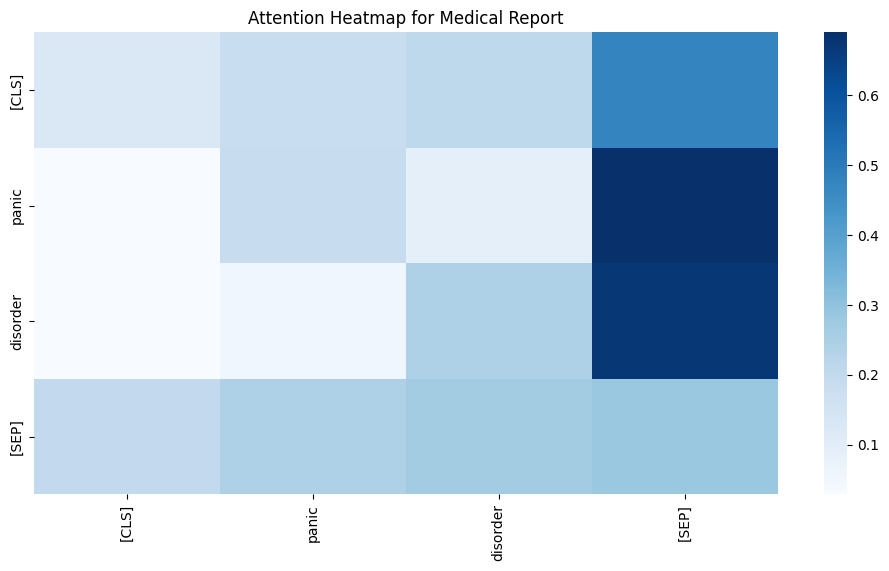


🔍 Visualizing Attention for Medical Report 4:

panic disorder


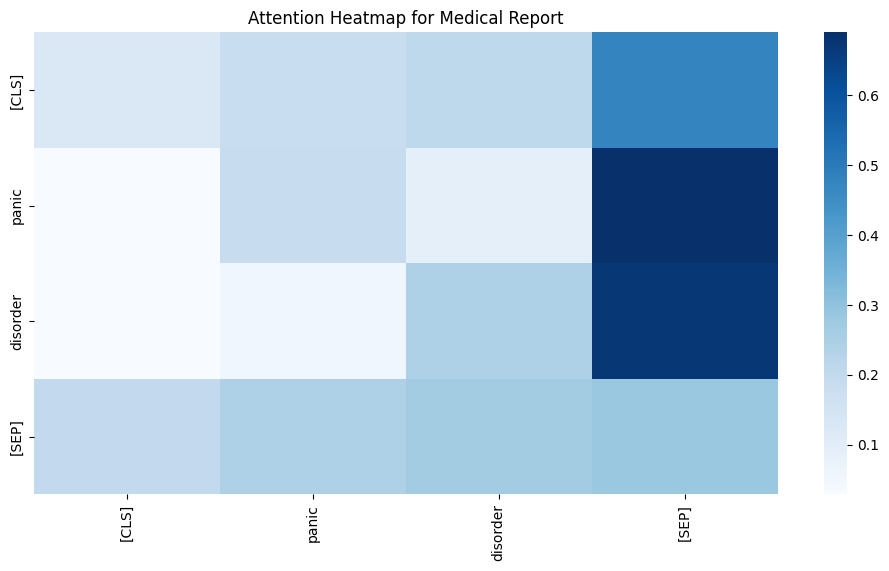


🔍 Visualizing Attention for Medical Report 5:

panic disorder


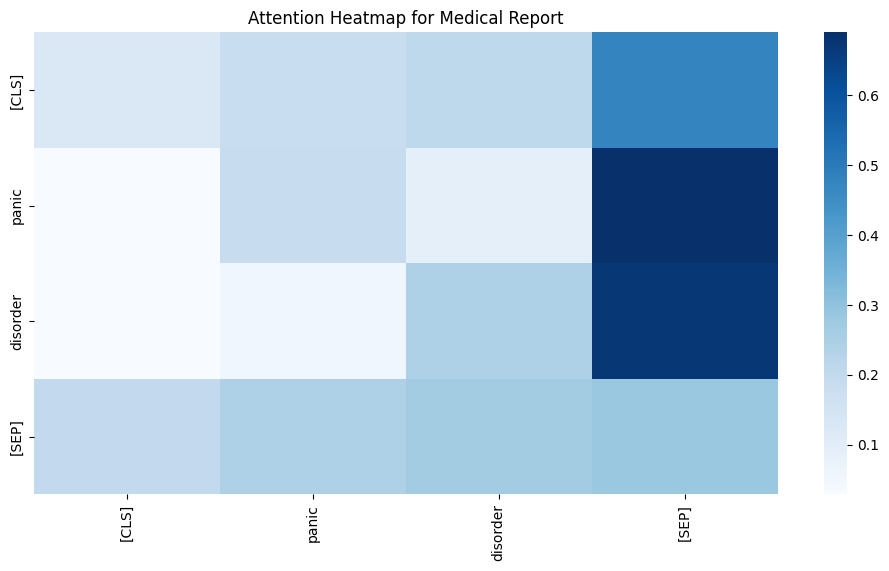

In [18]:
model_name = "emilyalsentzer/Bio_ClinicalBERT"
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertForSequenceClassification.from_pretrained(model_name, output_attentions=True)

# Function to visualize attention heatmap
def visualize_attention(text, model, tokenizer):
    tokens = tokenizer(text, return_tensors="pt", padding=True, truncation=True)
    with torch.no_grad():
        outputs = model(**tokens)
    attentions = outputs.attentions[-1]

    attn_matrix = attentions[0].mean(dim=0).cpu().numpy()
    tokenized_text = tokenizer.convert_ids_to_tokens(tokens["input_ids"][0])
    num_tokens = len(tokenized_text)
    attn_matrix = attn_matrix[:num_tokens, :num_tokens]

    # Plot attention heatmap
    plt.figure(figsize=(12, 6))
    sns.heatmap(attn_matrix, xticklabels=tokenized_text, yticklabels=tokenized_text, cmap="Blues", annot=False)
    plt.title("Attention Heatmap for Medical Report")
    plt.xticks(rotation=90)
    plt.show()

# Visualize attention for the first 5 medical reports
for i, note in enumerate(medical_notes[:5]):  # Adjust range as needed
    print(f"\n🔍 Visualizing Attention for Medical Report {i+1}:\n")
    print(note)
    visualize_attention(note, model, tokenizer)